Chapter 3
# 混合二维、三维可视化方案
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, lambdify, exp, diff

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [3]:
x, y = symbols("x, y")
# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数

# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

In [4]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

In [6]:
xx, yy = mesh(num = 6*100 + 1)
ff = f_xy_fcn(xx,yy)


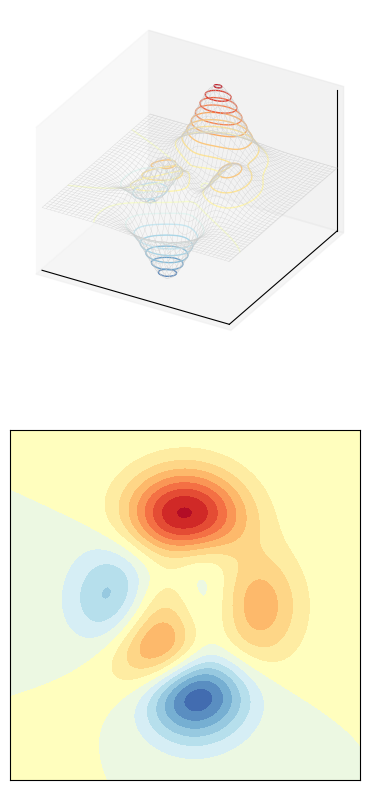

In [18]:
# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(5,10))

ax = fig.add_subplot(2, 1, 1, projection = '3d')

ax.plot_wireframe(xx, yy, ff, color = '0.8', lw = 0.2)

ax.contour(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r', linewidths = 1)

ax.set_proj_type('ortho')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)

ax = fig.add_subplot(2, 1, 2)

ax.contourf(xx, yy, ff,
           levels = np.linspace(-8,9,18),
           cmap = 'RdYlBu_r')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')

fig.savefig('Figures/add_subplot混合二维、三维.svg', format='svg')

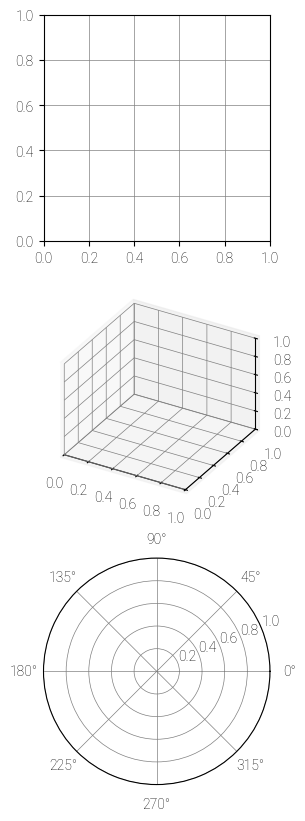

In [13]:
import matplotlib.pyplot as plt
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

fig = plt.figure(figsize=(5,10))
ax_2D = fig.add_subplot(3, 1, 1, aspect = 1)
# ax_2D.grid()

ax_3D = fig.add_subplot(3, 1, 2, projection = '3d')
ax_3D.set_proj_type('ortho')

ax_polar = fig.add_subplot(3, 1, 3, projection = 'polar')

fig.savefig('Figures/三种不同projections.svg', format='svg')